## Python Types Intro¶
####  Python has support for optional "type hints" (also called "type annotations").

####  These "type hints" or annotations are a special syntax that allow declaring the type of a variable.

####  By declaring types for your variables, editors and tools can give you better support.

####  This is just a quick tutorial / refresher about Python type hints. It covers only the minimum necessary to use them with FastAPI... which is actually very little.

####  FastAPI is all based on these type hints, they give it many advantages and benefits.

But even if you never use FastAPI, you would benefit from learning a bit about them.



In [1]:
def get_full_name(first_name, last_name):
    full_name = first_name.title() + " " + last_name.title()
    return full_name


print(get_full_name("john", "doe"))

John Doe


It's a very simple program.

But now imagine that you were writing it from scratch.

At some point you would have started the definition of the function, you had the parameters ready...

But then you have to call "that method that converts the first letter to upper case".

Was it upper? Was it uppercase? first_uppercase? capitalize?

Then, you try with the old programmer's friend, editor autocompletion.

You type the first parameter of the function, first_name, then a dot (.) and then hit Ctrl+Space to trigger the completion.

But, sadly, you get nothing useful:

Add types¶
Let's modify a single line from the previous version.

We will change exactly this fragment, the parameters of the function, from:


    first_name, last_name
to:


    first_name: str, last_name: str
That's it.

Those are the "type hints":


Python 3.10+

def get_full_name(first_name: str, last_name: str):
    full_name = first_name.title() + " " + last_name.title()
    return full_name


print(get_full_name("john", "doe"))


## Because the editor knows the types of the variables, you don't only get completion, you also get error checks:



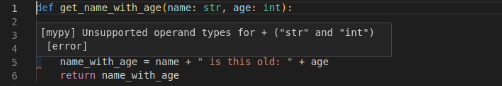

Now you know that you have to fix it, convert age to a string with str(age):



Declaring types¶
You just saw the main place to declare type hints. As function parameters.

This is also the main place you would use them with FastAPI.

Simple types¶
You can declare all the standard Python types, not only str.

You can use, for example:

int
float
bool
bytes


In [2]:
def get_items(item_a: str, item_b: int, item_c: float, item_d: bool, item_e: bytes):
    return item_a, item_b, item_c, item_d, item_e

## typing module¶


For some additional use cases, you might need to import some things from the standard library typing module, for example when you want to declare that something has "any type", you can use Any from typing:



In [4]:
from typing import Any


def some_function(data: Any):
    print(data)

## Generic types¶


Some types can take "type parameters" in square brackets, to define their internal types, for example a "list of strings" would be declared list[str].

These types that can take type parameters are called Generic types or Generics.

You can use the same builtin types as generics (with square brackets and types inside):

list
tuple
set
dict


## Union
You can declare that a variable can be any of several types, for example, an int or a str.

To define it you use the vertical bar (|) to separate both types.

This is called a "union", because the variable can be anything in the union of those two sets of types.


def process_item(item: int | str):
    print(item)
This means that item could be an int or a str.



Possibly None¶
You can declare that a value could have a type, like str, but that it could also be None.


Python 3.10+

def say_hi(name: str | None = None):
    if name is not None:
        print(f"Hey {name}!")
    else:
        print("Hello World")

Using str | None instead of just str will let the editor help you detect errors where you could be assuming that a value is always a str, when it could actually be None too.



## Pydantic models

Pydantic is a Python library to perform data validation.

You declare the "shape" of the data as classes with attributes.

And each attribute has a type.

Then you create an instance of that class with some values and it will validate the values, convert them to the appropriate type (if that's the case) and give you an object with all the data.

And you get all the editor support with that resulting object.

An example from the official Pydantic docs:




In [11]:
from datetime import datetime
from pydantic import BaseModel 

class User(BaseModel):
    name : str 
    age : int 
    signup_ts : datetime | None = None 
    friends : list[int] = []
    
    
external_data = {
    "name" : "Talha",
    "age" : "19",
    # "signup_ts": "2017-06-01 12:22",
    "friends" : ["12"]
}
user = User(**external_data)
print(user)

name='Talha' age=19 signup_ts=None friends=[12]


## Type Hints with Metadata Annotations
Python also has a feature that allows putting additional metadata in these type hints using Annotated.

You can import Annotated from typing

In [12]:
from typing import Annotated

def say_hello (name :  Annotated[str , "this is hello type "]):
    return "Hello" + "name"